In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, mean_squared_error

In [29]:
# Define image dimensions for preprocessing.
height = 300
width = 300

In [30]:
# Define directories for training and validation data.
train_dir = "D:\Minor\Minor 2\Project\Dataset(100)\Training"
validation_dir = "D:\Minor\Minor 2\Project\Dataset(100)\Validation"
test_dir = "D:\Minor\Minor 2\Project\Dataset(100)\Testing"

In [31]:
# Number of batches for data generators.
batch_size = 4

In [32]:
# Data augmentation for training images.
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                   horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(height, width),
                                                    batch_size=batch_size, class_mode='binary')


Found 34 images belonging to 2 classes.


In [33]:
# Data augmentation for validation images.
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                        horizontal_flip=True, vertical_flip=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width),
                                                              batch_size=batch_size, class_mode='binary')


Found 29 images belonging to 2 classes.


In [34]:
# Data augmentation for test images.
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                  horizontal_flip=True, vertical_flip=True)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(height, width),
                                                  batch_size=batch_size, class_mode='binary')

Found 4 images belonging to 2 classes.


In [35]:
# Load ResNet50 model without top layer.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))

In [36]:
# Add custom top layers for classification.
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [37]:
# Combine base model with custom top layers.
finetune_model = Model(inputs=base_model.input, outputs=predictions)

In [38]:
# Freeze layers of the base model.
for layer in base_model.layers:
    layer.trainable = False

In [39]:
# Compile the model.
finetune_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [40]:
# Checkpoint and early stopping.
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max', restore_best_weights=True)


In [41]:
# Train the model on training data with validation on validation data.
history = finetune_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=8,
                             validation_data=validation_generator, validation_steps=len(validation_generator),
                             callbacks=[checkpoint, early_stop])

C:\Users\ms036\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4564 - loss: 29.9258
Epoch 1: val_accuracy improved from -inf to 0.79310, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.4726 - loss: 30.9361 - val_accuracy: 0.7931 - val_loss: 51.6568
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6866 - loss: 56.0688
Epoch 2: val_accuracy improved from 0.79310 to 0.93103, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.6973 - loss: 53.7208 - val_accuracy: 0.9310 - val_loss: 10.6466
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9121 - loss: 27.7596
Epoch 3: val_accuracy did not improve from 0.93103
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.9121 - loss: 27.3214 - val_accuracy: 0.9310 - val_loss: 5.2730
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9804 - loss: 2.0138 
Epoch 4: val_accuracy improved from 0.93103 to 0.96552, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.9765 - loss: 2.2650 - val_accuracy: 0.9655 - val_loss: 6.5192
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9673 - loss: 2.3111
Epoch 5: val_accuracy did not improve from 0.96552
9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9647 - loss: 2.7885 - val_accuracy: 0.9655 - val_loss: 8.8425
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8614 - loss: 32.7177
Epoch 6: val_accuracy improved from 0.96552 to 1.00000, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 71s 8s/step - accuracy: 0.8664 - loss: 31.1955 - val_accuracy: 1.0000 - val_loss: 7.5900e-12
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8681 - loss: 7.8970
Epoch 7: val_accuracy did not improve from 1.00000
9/9 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.8754 - loss: 7.4555 - val_accuracy: 1.0000 - val_loss: 3.4737e-09
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8387 - loss: 21.3230
Epoch 8: val_accuracy did not improve from 1.00000
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8430 - loss: 20.5106 - val_accuracy: 1.0000 - val_loss: 4.1384e-27
Restoring model weights from the end of the best epoch: 6.


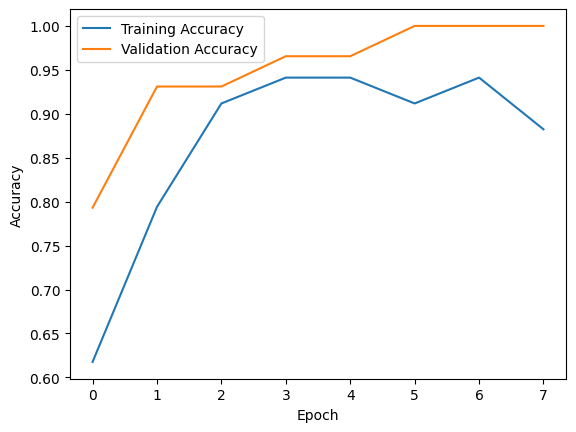

In [42]:
# Plot training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


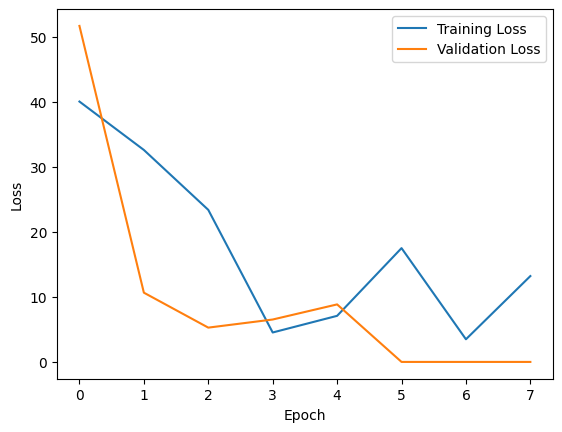

In [43]:
# Plot training and validation loss over epochs.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
# Testing the model.
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Real"
    else:
        return "Fake"

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


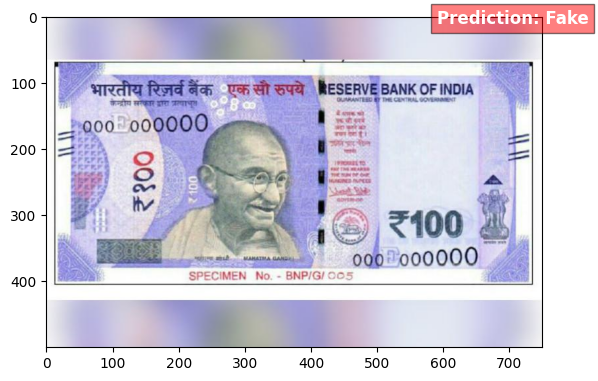

Prediction: Fake


In [45]:
# Specify the image path
test_img_path = r"Dataset(100)\Testing\Fake\1.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


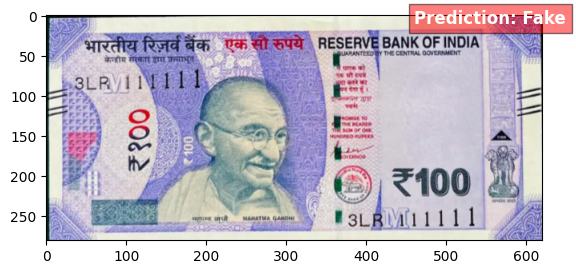

Prediction: Fake


In [46]:
# Specify the image path
test_img_path = r"Dataset(100)\Testing\Fake\2.png"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


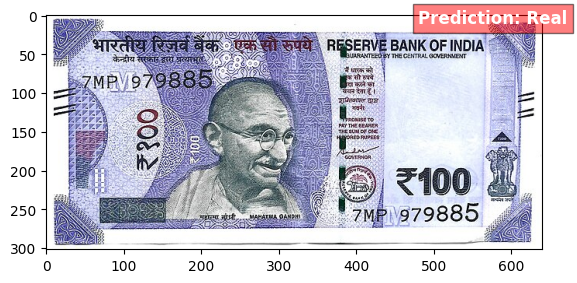

Prediction: Real


In [47]:
# Specify the image path
test_img_path = r"Dataset(100)\Testing\Real\1.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


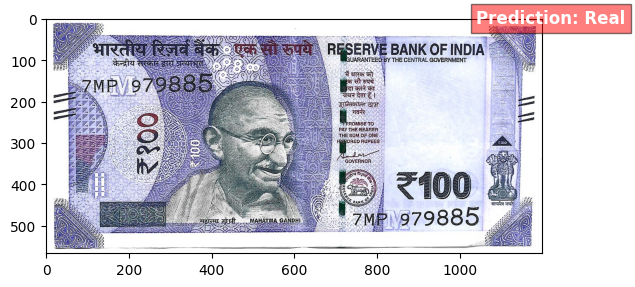

Prediction: Real


In [48]:
# Specify the image path
test_img_path = r"Dataset(100)\Testing\Real\2.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

In [49]:
# Calculate overall accuracy of the model on the validation set.
overall_accuracy = finetune_model.evaluate(
    validation_generator,
    steps=len(validation_generator),
    verbose=1
)

# Print overall accuracy.
print("Validation Accuracy:", overall_accuracy[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 1.0000 - loss: 1.7550e-35
Validation Accuracy: 1.0


In [50]:
# Calculate overall accuracy of the model on the training set.
overall_accuracy_training = finetune_model.evaluate(train_generator, steps=len(train_generator), verbose=1)
# Print overall accuracy on training set.
print("Overall Accuracy on Training Set:", overall_accuracy_training[1])


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 493ms/step - accuracy: 1.0000 - loss: 1.2399e-13
Overall Accuracy on Training Set: 1.0


In [51]:
# Reset the validation generator
validation_generator.reset()

# Make predictions
predictions = finetune_model.predict(
    validation_generator,
    steps=len(validation_generator),
    verbose=1
)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

true_classes = validation_generator.classes


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 668ms/step


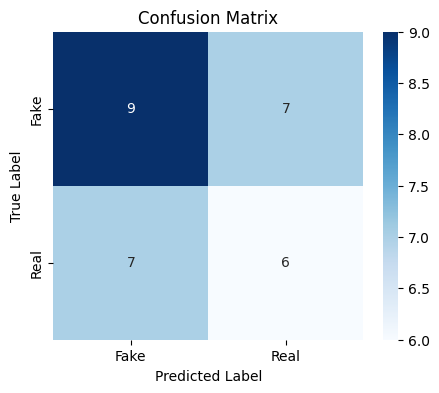

In [52]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [53]:
# Mean Squared Error
mse = mean_squared_error(true_classes, predicted_classes)
print(f"Mean Squared Error: {mse*100}")

Mean Squared Error: 48.275862068965516


In [54]:
finetune_model.save("model_100rs.keras")